# Открытие и предобработка данных / Open and prepare the data
<a id="start"></a>


In [331]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
import math
from scipy import stats as st
from IPython.display import display_html
from itertools import chain,cycle

In [332]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [333]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [335]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm') # how many gaps (%)

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


In [336]:
df.columns = df.columns.str.lower() #приводим названия столбцов к нижнему регистру / lower register

In [337]:
df = df[df['year_of_release'].notna()] #убираем пропущенные значения по столбцу год / drop gaps in the column

In [338]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm') #проверяем внесённые изменения

,0
name,0.010000
platform,0.000000
year_of_release,0.000000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.460000
user_score,40.170000


In [339]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y') #меняем тип данных в столбце "год выпуска" на формат дата / change format of the column

In [340]:
df.info() # проверяем внесенные изменения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16446 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16446 non-null  float64       
 5   eu_sales         16446 non-null  float64       
 6   jp_sales         16446 non-null  float64       
 7   other_sales      16446 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       9839 non-null   object        
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


In [341]:
df['year_of_release'] = df['year_of_release'].dt.year

In [342]:
df['rating'].unique() # проверяем уникальные значения возрастного рейтинга 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Описание рейтингов**

EС - early childhood - «Для детей младшего возраста»: Игра подходит для детей от 3 лет

E & K-A - everyone  & Kids to adults (первоначально)- 6+

E10+ - everyone 10+ - для 10 лет и старше

T - teen - подростки - от 13 лет

M - mature - для взрослых - от 17 лет

AO - adults only - строго от 18 лет

RP - raiting pending - рейтинг ожидается (отправлена заявка)

In [343]:
def figure_ratio(row):
  if row['rating'] == "E" or row['rating'] == "K-A":
    return 6
  if row['rating'] == "E10+":
    return 10
  if row['rating'] == "M":
    return 17
  if row['rating'] == "T": 
    return 13
  if row['rating'] == "AO":
    return 18
  if row['rating'] == "EC":
    return 3
  if row['rating'] == "RP":
    return "unknown"
df['figure_ratio'] = df.apply(figure_ratio, axis=1)

#создаем функцию, с помощью которой выставим числовое значение рейтинга в дополнительном столбце
# create a function that add in a new column figure of the age

In [344]:
df['figure_ratio'] = df['figure_ratio'].apply(pd.to_numeric, errors='coerce') #приводим данные к числовому формату, опуская ошибки

# change the type of data and ignore coerces

In [345]:
df.info() # проверяем как сработала функция

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  figure_ratio     9767 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


In [346]:
df.head(5)# проверяем как сработала функция

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,6.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,6.0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,6.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


In [347]:
df['figure_ratio'].value_counts()

6.0     3924
13.0    2905
17.0    1536
10.0    1393
3.0        8
18.0       1
Name: figure_ratio, dtype: int64

In [348]:
df['figure_ratio'].isna().sum() #проверяем количество пропущенных строк в нашем "числовом возрастном рейтинге"

# how many gaps in the column

6679

In [349]:
df.pivot_table(index='genre', values = 'figure_ratio', aggfunc='median') #получаем сводную таблицу с медианным возрастным рейтингом для жанра

# create a pivot table with median age  for genres

,figure_ratio
genre,
Action,13.0
Adventure,10.0
Fighting,13.0
Misc,6.0
Platform,6.0
Puzzle,6.0
Racing,6.0
Role-Playing,13.0
Shooter,17.0


In [350]:
def no_nan(dataset, category, value):
  for type in dataset[category].unique():
    dataset.loc[(dataset[value].isna())&(dataset[category]==type), value ] =\
dataset.loc[dataset[category]==type, value].median()
no_nan(df, 'genre', 'figure_ratio')

#Функция, которая заменяет пропуски в возрастной рейтинге по медиане, в зависимости от жанра
# create a function that fill gaps in the median age for genres

In [351]:
df['figure_ratio'].isna().sum() # проверяем кол-во пропусков

2

In [352]:
df.loc[ df['figure_ratio'].isna()] #получаем строки с пропущенными значениями

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  figure_ratio     16444 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


In [354]:
df.dropna(subset = ['name'], inplace=True) #удаляем пропущенные значения по столбцу имя / drop gaps

In [355]:
df.info() # проверяем наш датасет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  figure_ratio     16444 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


In [356]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,6.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,6.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,6.0


In [357]:
df['total_sales'] = df['eu_sales'] + df['na_sales'] + df['na_sales'] + df['jp_sales'] + df['other_sales'] #создаем столбец с суммарной выручкой
#add a column with summary revenue

In [358]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,6.0,123.90
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,6.0,69.32
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,6.0,51.20


In [359]:
df['critic_score'].unique() # проверяем уникальные оценки критиков

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [360]:
df['user_score'].unique() # проверяем уникальные оценки пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [361]:
critic_score = df[df['critic_score'].isna()] #создаем выборку с пропущенными значениями критиков / create a new variable with gaps in the coumn

In [362]:
critic_score.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,6.0,69.32
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,13.0,42.65
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,6.0,53.46


In [363]:
critic_score['year_of_release'].value_counts() # смотрим на кол-во пропусков по годам / receive summ of gaps in years

2009    775
2010    755
2008    712
2011    636
2007    505
2006    386
2015    381
1998    351
2012    332
2014    320
1999    299
2005    284
1997    272
2013    271
2016    270
1996    255
1995    219
2000    207
2002    202
2004    201
2003    190
2001    156
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: int64

In [364]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [365]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [366]:
df['user_score'] = df['user_score'].astype(float) #приводим оценку пользователей к числу / change type in the column

In [367]:
df['user_score'].unique() # проверяем внесенные изменения

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [368]:
users_score = df[df['user_score'].isna()] #делаем срез с пропущенными значениями по оценке пользователей / create a new variable with gaps in the coumn

In [369]:
users_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,6.0,69.32
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,13.0,42.65
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,6.0,53.46
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,17.0,55.24
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,6.0,33.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,13.0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,6.0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,10.0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,6.0,0.02


In [370]:
users_score['year_of_release'].value_counts() # смотрим на кол-во пропусков по годам / receive summ of gaps in years

2009    812
2010    788
2008    766
2011    635
2007    568
2006    454
2002    365
2005    356
1998    348
2012    314
2015    309
1999    307
2004    273
1997    271
2003    259
1996    255
2014    252
2000    243
2013    240
2016    240
2001    225
1995    219
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: int64

In [371]:
df['critic_score'] = df['critic_score'] / 10 # приводим оценку критиков к 10 бальной шкале / divide critic_score on 10

In [372]:
df['critic_score'] = df.groupby(["genre", "platform"])['critic_score'].transform(lambda x: x.fillna(x.median())) # заполняем пропуски по медиане 

# fill the gaps on the median

In [373]:
df.head(11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.60,8.0,E,6.0,123.90
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,6.0,69.32
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.20,8.3,E,6.0,51.20
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.00,8.0,E,6.0,48.38
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,13.0,42.65
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,6.0,53.46
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.90,8.5,E,6.0,41.08
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.80,6.6,E,6.0,42.87
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.70,8.4,E,6.0,42.76
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,17.0,55.24


In [374]:
df.info() # проверяем результат замены

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     15333 non-null  float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  figure_ratio     16444 non-null  float64
 12  total_sales      16444 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


In [375]:
df['user_score'] = df.groupby(["genre", "platform"])['user_score'].transform(lambda x: x.fillna(x.median())) # заполняем пропуски по медиане

# fill the gaps on the median

In [376]:
df.head(11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.60,8.0,E,6.0,123.90
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,6.0,69.32
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.20,8.3,E,6.0,51.20
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.00,8.0,E,6.0,48.38
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,13.0,42.65
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,6.0,53.46
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.90,8.5,E,6.0,41.08
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.80,6.6,E,6.0,42.87
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.70,8.4,E,6.0,42.76
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,17.0,55.24


In [377]:
df.info() # проверяем результат замены

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     15333 non-null  float64
 9   user_score       15340 non-null  float64
 10  rating           9768 non-null   object 
 11  figure_ratio     16444 non-null  float64
 12  total_sales      16444 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


In [378]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,6.760000
user_score,6.710000


1. We changed some data types in columns: date, user_score, critic_score and rating.
2. Add a new column with figure_ratio because ESRB was alphabetic
3. Searched the gaps: 1,6% in the year_of_release - we dropped it; created the function, and filled the gaps in figure_ratio on the median count of the genre; 40 and 50% in the columns user_score and critic_score, and decided to fill the gaps on the median count of the platform and genre


# Исследовательский анализ / Investigation of the data
<a id="discovery"></a>


In [379]:
count_games = df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False) # смотрим на количество игр по годам
# create a pivot table with count of the games in years

In [380]:
count_games

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


In [381]:
total_platform = df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False) # формируем сводную таблицу с продажами по платформам
# create a pivot table with total sales on platforms

In [382]:
total_platform

,total_sales
platform,
PS2,1806.48
X360,1556.98
Wii,1378.05
PS3,1321.47
DS,1183.09
PS,1062.30
GBA,497.00
XB,433.63
PS4,422.88


In [383]:
total_platform = total_platform[ total_platform['total_sales'] > 100] # оставляем платформы с суммарными продажами более 100

In [384]:
total_platform

,total_sales
platform,
PS2,1806.48
X360,1556.98
Wii,1378.05
PS3,1321.47
DS,1183.09
PS,1062.30
GBA,497.00
XB,433.63
PS4,422.88


In [385]:
popular_platforms = df 

<div class="alert alert-success">
<h3>Комментарий ревьюера</h3>

Это кстати не копия, а ссылка, если ты сделаешь изменения в `popular_platforms`, они будут видны и в df, чтобы сделать копию, надо `popular_platforms = df.copy()`
</div>

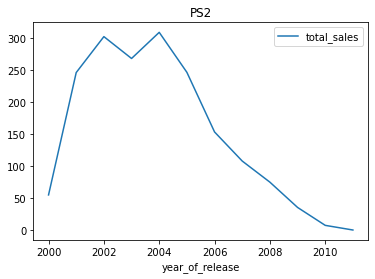

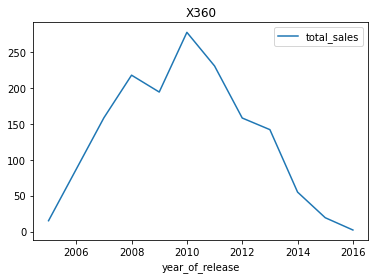

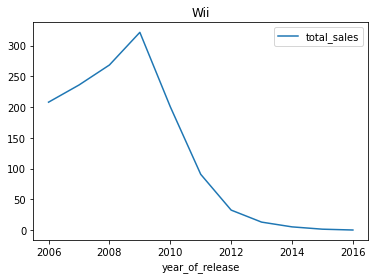

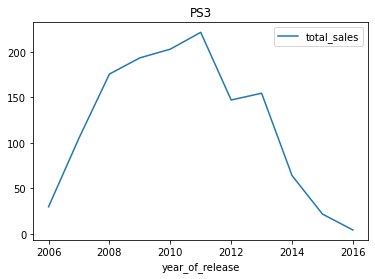

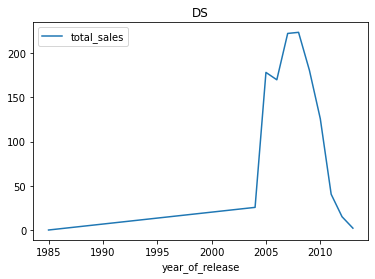

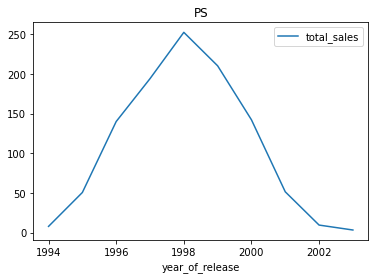

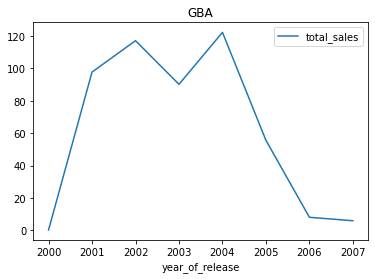

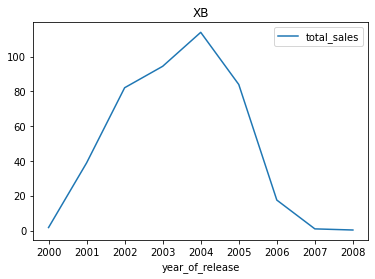

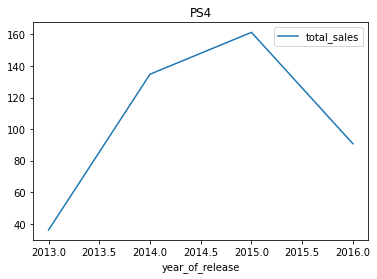

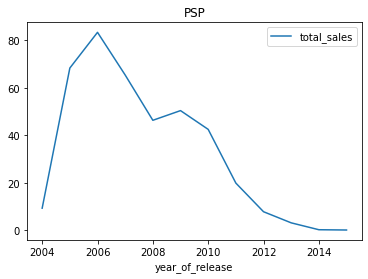

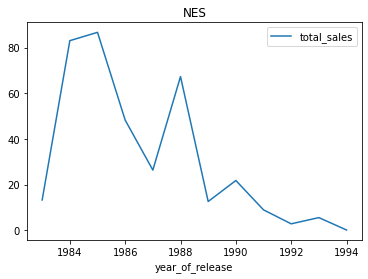

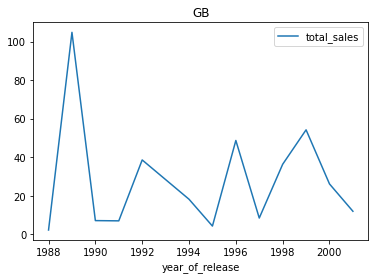

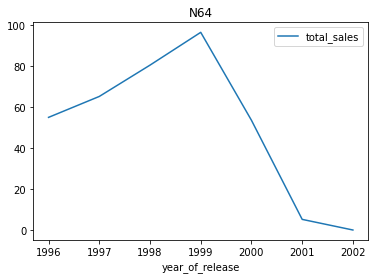

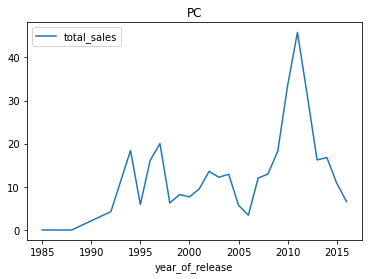

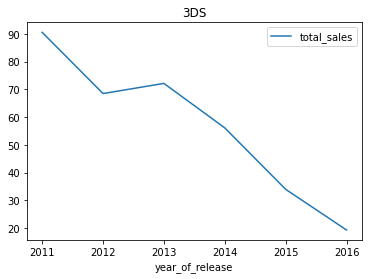

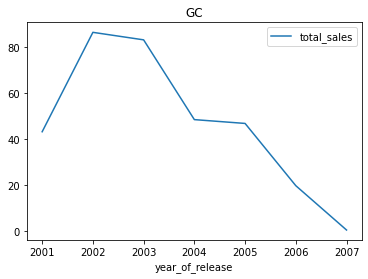

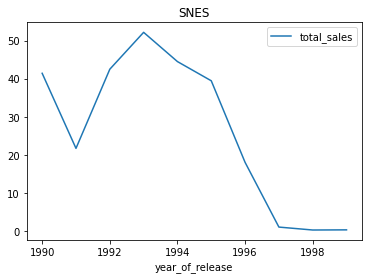

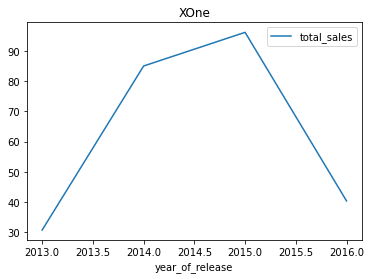

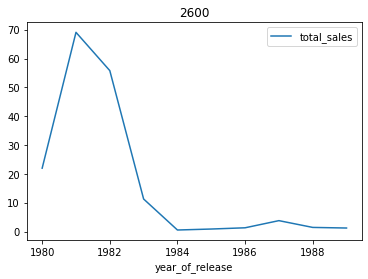

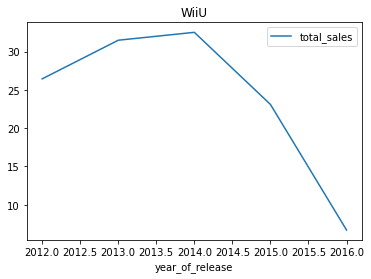

In [386]:
for platform in total_platform.index:
  popular_platforms.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
      title = platform
  )
# функция, которая строит график только с популярными платформами

In [387]:
actual_data = popular_platforms.query('(year_of_release > 2012)') #оставляем данные после 2012 г / query the data on a criterion

In [388]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2223 non-null   float64
 9   user_score       2230 non-null   float64
 10  rating           1256 non-null   object 
 11  figure_ratio     2233 non-null   float64
 12  total_sales      2233 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 244.2+ KB


In [389]:
actual_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,17.0,28.07
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,17.0,25.93
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,7.6,6.9,NaN,17.0,20.66
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,7.4,7.8,NaN,13.0,19.88
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,17.0,16.58


In [390]:
actual_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [391]:
profitable_platforms = actual_data.query('( platform == ["PS4", "3DS", "XOne"])')  # оставляем потенциально прибыльные платформы/ query the data on profitable platforms

In [392]:
profitable_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,figure_ratio,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,7.60,6.9,NaN,17.0,20.66
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,7.40,7.8,NaN,13.0,19.88
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.70,8.3,M,17.0,16.58
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,7.40,7.8,NaN,13.0,16.03
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.20,4.3,E,6.0,9.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,6.25,6.8,NaN,13.0,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,7.40,6.7,NaN,13.0,0.02
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,6.25,6.8,NaN,13.0,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,7.40,6.8,M,17.0,0.02


In [393]:
top3_platforms = profitable_platforms.pivot_table(index=['platform'], values='total_sales', aggfunc='sum') # топ-3 прибыльные платформы

In [394]:
top3_platforms

,total_sales
platform,
3DS,181.45
PS4,422.88
XOne,252.44


In [395]:
top3_plat_genre = profitable_platforms.pivot_table(index=['platform', 'genre'], values='total_sales', aggfunc='sum') # топ-3 прибыльные платформы по жанрам

In [396]:
top3_plat_genre

total_sales
platform genre                    
3DS      Action              42.64
         Adventure            3.99
         Fighting            11.60
         Misc                 8.34
         Platform            12.20
         Puzzle               1.94
         Role-Playing        85.79
         Shooter              0.06
         Simulation          11.25
         Sports               2.06
         Strategy             1.58
PS4      Action             128.93
         Adventure            8.29
         Fighting            12.25
         Misc                11.33
         Platform            10.14
         Puzzle               0.02
         Racing              14.75
         Role-Playing        38.33
         Shooter            121.22
         Simulation           1.44
         Sports              75.39
         Strategy             0.79
XOne     Action              58.68
         Adventure            3.95
         Fighting             4.10
         Misc                12.20
         Platform             1.44
         Racing              14.15
         Role-Playing        16.70
         Shooter             97.19
         Simulation           1.01
         Sports              42.33
         Strategy             0.69

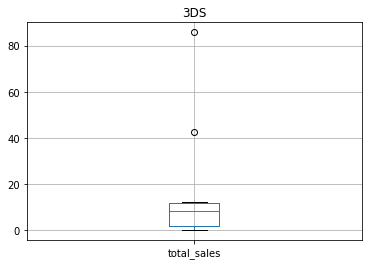

In [397]:
top3_plat_genre.query('(platform == "3DS")').boxplot() # ящик с усами для ПК
plt.title('3DS')
plt.show()

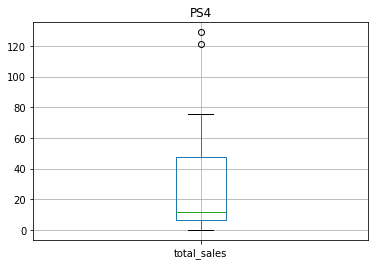

In [398]:
top3_plat_genre.query('(platform == "PS4")').boxplot()# ящик с усами для PS4
plt.title('PS4')
plt.show()

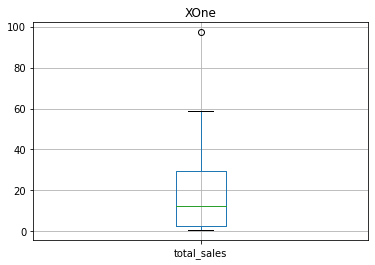

In [399]:
top3_plat_genre.query('(platform == "XOne")').boxplot() # ящик с усами для XOne
plt.title('XOne')
plt.show()

In [400]:
ps4 = profitable_platforms.query('(platform == "PS4")') #срез по PS4

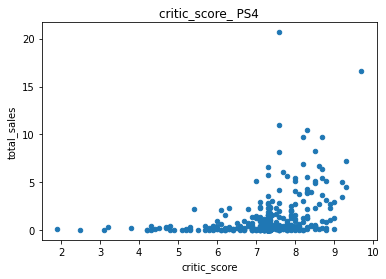

In [401]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter') #диаграмма рассеяния по PS4. Оценка критиков
plt.title('critic_score_ PS4')
plt.show()

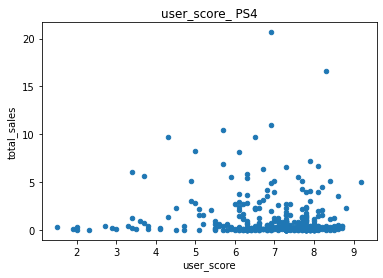

In [402]:
ps4.plot(x='user_score', y='total_sales', kind='scatter')#диаграмма рассеяния по PS4. Оценка пользователей
plt.title('user_score_ PS4')
plt.show()

In [403]:
ps4.corr().style.background_gradient('coolwarm') #корреляция по PS4

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,figure_ratio,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.006545,0.134362,0.017889,-0.242162
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.326009,-0.061622,0.176532,0.960859
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.302911,-0.087532,0.129081,0.925242
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.262591,0.150307,0.242291,0.520067
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.332535,-0.076034,0.161109,0.997834
critic_score,-0.006545,0.326009,0.302911,0.262591,0.332535,1.000000,0.515543,0.113153,0.337203
user_score,0.134362,-0.061622,-0.087532,0.150307,-0.076034,0.515543,1.000000,0.212906,-0.070255
figure_ratio,0.017889,0.176532,0.129081,0.242291,0.161109,0.113153,0.212906,1.000000,0.170454
total_sales,-0.242162,0.960859,0.925242,0.520067,0.997834,0.337203,-0.070255,0.170454,1.000000


In [404]:
ds = profitable_platforms.query('(platform == "3DS")') #срез по 3DS и корреляция
ds.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,figure_ratio,total_sales
year_of_release,1.000000,-0.075933,-0.115177,-0.063487,-0.083695,0.000496,0.073662,0.056501,-0.087376
na_sales,-0.075933,1.000000,0.931893,0.641878,0.993708,0.182959,0.122705,0.019229,0.966692
eu_sales,-0.115177,0.931893,1.000000,0.633982,0.958274,0.162367,0.092734,-0.050795,0.940178
jp_sales,-0.063487,0.641878,0.633982,1.000000,0.645306,0.190594,0.166936,0.132795,0.807492
other_sales,-0.083695,0.993708,0.958274,0.645306,1.000000,0.183678,0.117286,-0.002470,0.970043
critic_score,0.000496,0.182959,0.162367,0.190594,0.183678,1.000000,0.657205,-0.033485,0.197583
user_score,0.073662,0.122705,0.092734,0.166936,0.117286,0.657205,1.000000,0.052351,0.140870
figure_ratio,0.056501,0.019229,-0.050795,0.132795,-0.002470,-0.033485,0.052351,1.000000,0.040290
total_sales,-0.087376,0.966692,0.940178,0.807492,0.970043,0.197583,0.140870,0.040290,1.000000


In [405]:
xbox = profitable_platforms.query('(platform == "XOne")') # cрез по Xone и корреляция
xbox.corr().style.background_gradient('coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,figure_ratio,total_sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.073555,0.057571,0.075782,-0.242192
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.309746,-0.073930,0.221817,0.988518
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.318707,-0.064056,0.152269,0.853804
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.183483,0.061996,0.148212,0.445604
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.327218,-0.074258,0.216051,0.999508
critic_score,0.073555,0.309746,0.318707,0.183483,0.327218,1.000000,0.432166,0.120957,0.325573
user_score,0.057571,-0.073930,-0.064056,0.061996,-0.074258,0.432166,1.000000,0.136554,-0.074509
figure_ratio,0.075782,0.221817,0.152269,0.148212,0.216051,0.120957,0.136554,1.000000,0.215397
total_sales,-0.242192,0.988518,0.853804,0.445604,0.999508,0.325573,-0.074509,0.215397,1.000000


In [406]:
profitable_platforms.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False) #сводная таблица прибыльных платформ по жанрам

,total_sales
genre,
Action,230.25
Shooter,218.47
Role-Playing,140.82
Sports,119.78
Misc,31.87
Racing,28.90
Fighting,27.95
Platform,23.78
Adventure,16.23


1. We analyzed the number of games over the years, dropped the data before 2012
2. New platforms appear in four-six years
4. The most profitable platforms: PS4, Xbox One, 3DS
5. We can see the correlation between sales and critic's scores, but user's scores don't impact on that
6. TOP-3 genres: shooter, action and sport

# Портреты пользователей / User portraits
<a id="portrets"></a>


In [407]:
na_sales = actual_data.pivot_table(index=['platform'], values=['na_sales'] , aggfunc='sum').sort_values(by ='na_sales',ascending=False).head(5) #сводная таблица по Северной Америке с самыми популярными платформами

In [408]:
na_sales['prop'] = na_sales['na_sales'] / na_sales['na_sales'].sum() * 100

In [409]:
na_sales

,na_sales,prop
platform,,
PS4,108.74,28.228026
XOne,93.12,24.173200
X360,81.66,21.198276
PS3,63.50,16.484087
3DS,38.20,9.916411


In [410]:
eu_sales = actual_data.pivot_table(index=['platform'], values=['eu_sales'] , aggfunc='sum').sort_values(by ='eu_sales',ascending=False).head(5)#сводная таблица по Европе с самыми популярными платформами

In [411]:
eu_sales['prop'] = eu_sales['eu_sales'] /  eu_sales['eu_sales'].sum() * 100

In [412]:
eu_sales

,eu_sales,prop
platform,,
PS4,141.09,42.246310
PS3,67.81,20.304219
XOne,51.59,15.447495
X360,42.52,12.731682
3DS,30.96,9.270294


In [413]:
jp_sales = actual_data.pivot_table(index=['platform'], values=['jp_sales'] , aggfunc='sum').sort_values(by ='jp_sales',ascending=False).head(5)#сводная таблица по Японии с самыми популярными платформами

In [414]:
jp_sales['prop'] = jp_sales['jp_sales'] /jp_sales['jp_sales'].sum() * 100

In [415]:
jp_sales

,jp_sales,prop
platform,,
3DS,67.81,49.644923
PS3,23.35,17.094956
PSV,18.59,13.610074
PS4,15.96,11.684604
WiiU,10.88,7.965444


In [416]:
other_sales = actual_data.pivot_table(index=['platform'], values=['other_sales'] , aggfunc='sum').sort_values(by ='other_sales',ascending=False).head(5)#сводная таблица по другим странам с самыми популярными платформами

In [417]:
other_sales['prop'] = other_sales['other_sales'] / other_sales['other_sales'].sum() * 100

In [418]:
other_sales

,other_sales,prop
platform,,
PS4,48.35,44.859900
PS3,26.77,24.837632
XOne,14.27,13.239933
X360,12.11,11.235851
3DS,6.28,5.826684


In [419]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [420]:
display_side_by_side(na_sales,eu_sales,jp_sales, other_sales, titles=['na_sales','eu_sales', 'jp_sales', 'other_sales'])

,na_sales,prop
platform,,
PS4,108.74,28.228026
XOne,93.12,24.173200
X360,81.66,21.198276
PS3,63.50,16.484087
3DS,38.20,9.916411
,eu_sales,prop
platform,,
PS4,141.09,42.246310
PS3,67.81,20.304219


In [421]:
eu_genre = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_genre
# cамые популярные жанры в Европе

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [422]:
na_genre = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na_genre
# cамые популярные жанры в Cеверной Америке

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [423]:
jp_genres = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_genres
#Самые популярные жанры в Японии

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [424]:
other_genre =  actual_data.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False).head(5)
other_genre
#Самые популярные жанры в других странах

,other_sales
genre,
Action,37.20
Shooter,28.77
Sports,19.45
Role-Playing,11.48
Misc,6.09


In [425]:
display_side_by_side(eu_genre,na_genre,jp_genres, other_genre, titles=['eu_genre','na_genre', 'jp_genres', 'other_genre'])

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
,na_sales
genre,
Action,126.05
Shooter,109.74


In [426]:
figure_rat = actual_data.pivot_table(index='genre', values='figure_ratio', aggfunc='median').astype(int) #сводная таблица со средним ограничением возрастного рейтинга по жанрам

In [427]:
figure_rat

,figure_ratio
genre,
Action,13
Adventure,10
Fighting,13
Misc,6
Platform,10
Puzzle,6
Racing,6
Role-Playing,13
Shooter,17


In [428]:
na_sales_new = profitable_platforms[['na_sales', 'figure_ratio']]
na_sales_corr = na_sales_new.pivot_table(index='figure_ratio', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

In [429]:
eu_sales_new = profitable_platforms[['eu_sales', 'figure_ratio']]
eu_sales_corr = eu_sales_new.pivot_table(index='figure_ratio', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

In [430]:
jp_sales_new = profitable_platforms[['jp_sales', 'figure_ratio']]
jp_sales_corr = jp_sales_new.pivot_table(index='figure_ratio', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [431]:
other_sales_new = profitable_platforms[['other_sales', 'figure_ratio']]
other_sales_corr = other_sales_new.pivot_table(index='figure_ratio', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False)

In [432]:
display_side_by_side(na_sales_corr,eu_sales_corr,jp_sales_corr, other_sales_corr, titles=['na_sales_corr','eu_sales_corr', 'jp_sales_corr', 'other_sales_corr'])

,na_sales
figure_ratio,
17.0,105.57
13.0,62.42
6.0,47.99
10.0,24.08
,eu_sales
figure_ratio,
17.0,96.32
6.0,57.57
13.0,51.21


1. Results in North America almost with the list of profitable platforms. European citizens prefer PS; Japan prefer Nintendo, other countries just copy the Europe model
2. Top-3 genres from NA, EU and other countries are shooters, actions and sports. Japan prefer role-playing games
3. Age censure is similar to NA and other countries. Japan showed good results in games for children, Europe on the first plays - games for adult

# Проверка гипотез / Check out hypotheses
<a id="hyp"></a>

In [433]:
pc_hyp = actual_data.query('(platform == "PC")') #cрез по платформе PC

In [434]:
xone_hyp  = actual_data.query('(platform == "XOne")') #cрез по платформе Xbox One

Н0 - средние пользовательские рейтинги ПК и Xbox One равны / The mean user ratio between Xbox One and PC is the same

H1 - средние пользовательские рейтинги ПК и Xbox One НЕ равны The mean user ratio between Xbox One and PC isn't the same

In [435]:
alpha = 0.05  
results = st.ttest_ind(pc_hyp['user_score'] , xone_hyp['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу / reject H0')
else:
    print('Не получилось отвергнуть нулевую гипотезу / coudnt reject H0')

p-значение: 0.3534918848669636
Не получилось отвергнуть нулевую гипотезу / coudnt reject H0


In [436]:
action = actual_data.query('(genre == "Action")') #срез по жанру экшен

In [437]:
sport = actual_data.query('(genre == "Sports")')#срез по жанру спорт

Н0 - средние пользовательские рейтинги жанров экшен и спорт равны / The mean user ratio between 'Action' and 'Sports' the same


H1 - средние пользовательские рейтинги жанров экшен и спорт НЕ равны / The mean user ratio between 'Action' and 'Sports' isn't the same


In [438]:
alpha = 0.05  
results = st.ttest_ind(action['user_score'] , sport['user_score'], nan_policy='propagate')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу / reject H0')
else:
    print('Не получилось отвергнуть нулевую гипотезу / coudnt reject H0')

p-значение: 8.590101836267864e-48
Отвергаем нулевую гипотезу / reject H0


1. The mean user ratio between Xbox One and PC is the same 
2. The mean user ratio between 'Action' and 'Sports' isn't the same